# Introduction

In recent years, the gaming industry has experienced explosive growth, with thousands of new titles being released across various platforms. As the number of games increases, understanding their characteristics and accurately categorizing them into genres has become crucial for players and developers. Genres provide insight into a game's gameplay style, mechanics, and target audience. However, given the vast volume of games and the variability in user reviews, manually classifying games into specific genres is a challenging task.

This project aims to address this challenge by leveraging **Unsupervised Learning** techniques to automatically infer the genre of video games based on user review comments and other game-related data. Traditional classification methods require labeled data, which is not always available. In contrast, Unsupervised Learning allows us to find patterns and group games without predefined labels. By applying clustering algorithms to text-based features, such as user reviews, we aim to identify similar games and infer their potential genres.

The ultimate goal of this project is not only to classify games into their respective genres but also to analyze the underlying data structure, revealing trends and patterns that may reflect broader developments in the gaming industry.

This report outlines the following steps:
1. Data collection and preprocessing, focusing on cleaning and preparing the Steam dataset.
2. Conducting **Exploratory Data Analysis (EDA)** to understand the data distribution and identify potential patterns.
3. Building models using various clustering techniques, including **K-means** and **Hierarchical Clustering**.
4. Evaluating the performance of the models based on the inferred game genres.
5. Concluding with insights drawn from the results and discussing the implications of the findings for the gaming industry.


# Data Collection and Preprocessing

## Data Source and Provenance
The dataset used for this project is the [Steam Games Dataset](https://www.kaggle.com/datasets/fronkongames/steam-games-dataset). This dataset was created using code under the MIT license and data was collected through the Steam API and Steam Spy, a service providing detailed game statistics. The dataset includes over 100,000 games with various attributes such as game titles, release dates, developers, publishers, genres, user reviews, and playtime.

I selected this dataset for several reasons:
1. **Diversity of Data**: It covers a wide variety of games from different genres, which is crucial for building a robust unsupervised learning model that can distinguish between genres based on user reviews and other gameplay data.
2. **Textual and Numerical Features**: The dataset contains both text-based features like user reviews and numerical features like playtime, making it well-suited for a range of clustering techniques.
3. **Richness of Features**: The dataset includes many other attributes, such as game descriptions, user ratings, and supported platforms, providing valuable context for analyzing and clustering games.


## Data Characteristics
Key columns in the dataset include:
- **AppID**: A unique identifier for each game.
- **Title**: The title of the game.
- **Release Date**: The game's release date.
- **Developer**: The game’s developer.
- **Publisher**: The publisher responsible for distributing the game.
- **Genres**: Genres assigned to each game (e.g., Action, RPG).
- **Reviews**: User-submitted reviews of the game.
- **Playtime**: The total playtime reported by users.

These columns provide critical information about each game and form the basis of the unsupervised learning analysis.


## Unsupervised Learning Problem

The primary problem addressed in this project is the **genre classification of video games** based on user reviews and other game-related data. Video games often belong to multiple genres, and their distinctions are not always clear-cut. Furthermore, explicit genre labels may not be available or consistent across platforms, making manual classification difficult.

Given these challenges, **unsupervised learning** techniques, such as clustering, are ideal for this task. By analyzing text-based features like user reviews and gameplay data, we aim to group similar games together and infer natural clusters that correspond to genres. This approach is scalable for large datasets and does not rely on predefined labels, allowing us to uncover underlying patterns within the data.

### Data Overview
Before proceeding with the analysis, I examined the dataset's structure. Below is a preview of the first few rows:


In [18]:
import pandas as pd

# Load the CSV data
csv_file_path = 'data/games.csv'
games_data = pd.read_csv(csv_file_path)

# Display the first few rows to ensure the data is loaded correctly
games_data.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


The dataset consists of 39 columns, covering a wide range of information such as the game's description, supported languages, and user engagement metrics.

### Handling Missing Data
Upon inspecting the dataset, several columns were found to have missing values. Key columns with missing data include:

- **AppID**: 6 missing values.
- **Reviews**: 87,285 missing values.
- **Genres**: 4,841 missing values.
- **Developers**: 4,877 missing values.

To handle missing data, I implemented the following strategies:

- **AppID**: Since AppID is a critical unique identifier, rows with missing AppID values were removed.
- **Text-based columns**: Important columns such as "About the game", "Reviews", "Developers", "Publishers", and "Genres" were filled with empty strings ('') to preserve the remaining information.
- **Non-essential columns**: Columns with a high percentage of missing values that were not directly relevant to the analysis, such as "Website", "Support url", and "Metacritic url", were dropped to simplify the dataset.



In [19]:
# Fill missing text or categorical data with empty strings
games_data['About the game'] = games_data['About the game'].fillna('')
games_data['Reviews'] = games_data['Reviews'].fillna('')
games_data['Developers'] = games_data['Developers'].fillna('')
games_data['Publishers'] = games_data['Publishers'].fillna('')
games_data['Categories'] = games_data['Categories'].fillna('')
games_data['Genres'] = games_data['Genres'].fillna('')
games_data['Tags'] = games_data['Tags'].fillna('')

# Drop unnecessary columns with too many missing values
games_data = games_data.drop(columns=['Website', 'Support url', 'Support email', 'Metacritic url', 'Score rank', 'Notes', 'Screenshots', 'Movies'])

# Verify that missing data has been handled
missing_data = games_data.isnull().sum()
missing_data[missing_data > 0]

AppID    6
dtype: int64

By carefully handling missing data, the dataset is now clean and ready for further analysis, ensuring that essential information for the unsupervised learning tasks is preserved.

# Exploratory Data Analysis (EDA)

In this section, I will explore the Steam Games Dataset to understand the underlying structure of the data, identify patterns, and prepare for the next steps in model building.

## Basic Statistics for Numerical Columns
Here is a summary of the basic statistics for the numerical columns in the dataset:


In [20]:
# Display basic statistics for numerical columns
games_data.describe()

,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,9.741000e+04,97410.000000,97410.000000,97410.0,97410.000000,97410.000000,97410.000000,9.741000e+04,97410.000000,97410.000000,9.741000e+04,97410.000000,97410.000000,97410.000000,97410.000000
mean,1.627283e+02,0.282497,7.086262,0.0,0.493081,2.959193,0.034791,8.489366e+02,141.065989,18.562622,6.905128e+02,91.797937,9.621271,81.852459,10.340417
std,7.687116e+03,2.144294,12.387782,0.0,12.832834,14.545462,1.674105,2.287011e+04,4278.019743,160.413540,1.681717e+04,1068.494928,177.190210,1412.496536,192.711603
min,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.990000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,4.190000,0.0,0.000000,0.000000,0.000000,5.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+00,0.000000,9.990000,0.0,0.000000,0.000000,0.000000,3.500000e+01,10.000000,17.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,1.284268e+06,21.000000,999.980000,0.0,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


The statistics reveal that many columns, such as **Price**, **User score**, and **Average playtime forever**, contain predominantly zero values, indicating that they are not suitable for analysis in their current form.

## Insights from Data Transformation
To address skewness in the data, I focused on non-zero values and applied log transformations. However, the results showed that very few non-zero values exist for many features, making them ineffective for meaningful analysis.

### Shift in Focus: Textual Features
Given the limitations of the numerical data, I shifted my focus to textual features such as:

- **Genres**: Categories such as Action, Adventure, Indie, etc.
- **Tags**: User-defined tags like Indie, Singleplayer, or Action.
- **Categories**: Gameplay modes such as Single-player, Multi-player, and Steam Achievements.

These textual features offer richer information, which can be explored through clustering or natural language processing (NLP) techniques to gain insights into how games are categorized or related.

## Exploring Genres, Tags, and Categories
To better understand the distribution of games across genres, tags, and categories, I first split these columns into lists of values for each game:


In [21]:
# Split 'Genres', 'Tags', and 'Categories' columns into lists
games_data['Genres_list'] = games_data['Genres'].fillna('').apply(lambda x: x.split(','))
games_data['Tags_list'] = games_data['Tags'].fillna('').apply(lambda x: x.split(','))
games_data['Categories_list'] = games_data['Categories'].fillna('').apply(lambda x: x.split(','))
# Preview the cleaned data
games_data[['Genres_list', 'Tags_list', 'Categories_list']].head()


,Genres_list,Tags_list,Categories_list
20200,"[Casual, Indie, Sports]","[Indie, Casual, Sports, Bowling]","[Single-player, Multi-player, Steam Achievemen..."
655370,"[Action, Indie]","[Indie, Action, Pixel Graphics, 2D, Retro, Arc...","[Single-player, Steam Achievements, Full contr..."
1732930,"[Action, Adventure, Indie, Strategy]",[],[Single-player]
1355720,"[Adventure, Casual, Indie]","[2D Platformer, Atmospheric, Surreal, Mystery,...","[Single-player, Full controller support]"
1139950,"[Adventure, Indie]","[Indie, Adventure, Nudity, Violent, Sexual Con...","[Single-player, Steam Achievements]"


### Genre Distribution
The most common genres in the dataset are shown in the bar chart below. The Indie genre dominates, followed by Casual, Action, and Adventure, reflecting the strong presence of indie games on the Steam platform.


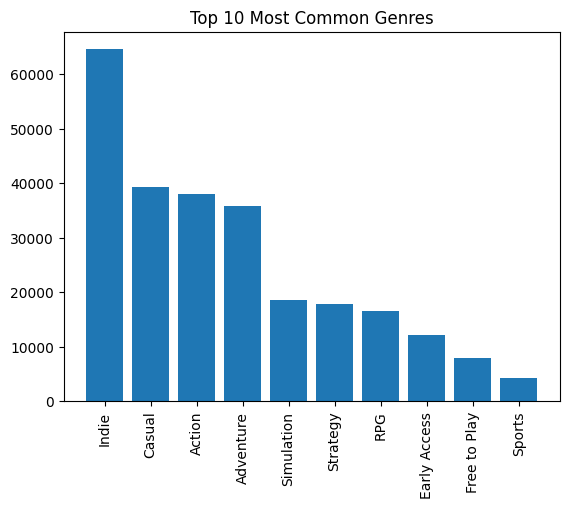

In [22]:
from collections import Counter
import matplotlib.pyplot as plt

# Count occurrences of each genre
genre_counter = Counter([genre for sublist in games_data['Genres_list'] for genre in sublist if genre])
common_genres = genre_counter.most_common(10)

# Plot the top 10 genres
genres, counts = zip(*common_genres)
plt.bar(genres, counts)
plt.title('Top 10 Most Common Genres')
plt.xticks(rotation=90)
plt.show()

### Tag Distribution
Tags provide a nuanced description of the games, reflecting gameplay mechanics or visual styles. The top 10 most common tags include Indie, Singleplayer, Action, and Adventure.


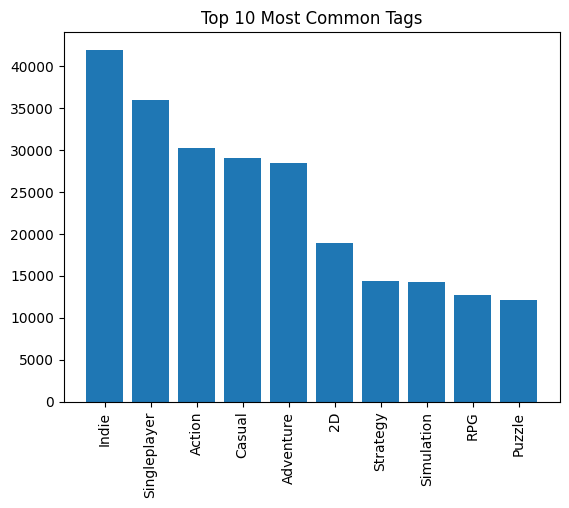

In [23]:
# Count occurrences of each tag
tag_counter = Counter([tag for sublist in games_data['Tags_list'] for tag in sublist if tag])
common_tags = tag_counter.most_common(10)

# Plot the top 10 tags
tags, counts = zip(*common_tags)
plt.bar(tags, counts)
plt.title('Top 10 Most Common Tags')
plt.xticks(rotation=90)
plt.show()

### Category Distribution
Categories describe gameplay modes and platform-specific features. The most common category is Single-player, aligning with the popularity of singleplayer games on Steam.


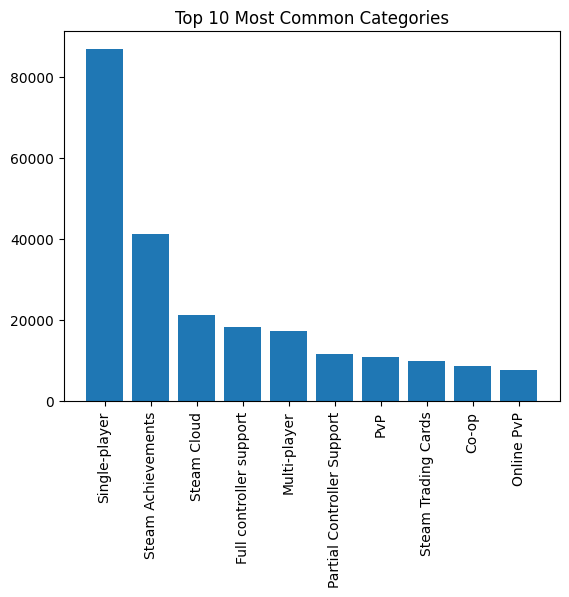

In [24]:
# Count occurrences of each category
category_counter = Counter([category for sublist in games_data['Categories_list'] for category in sublist if category])
common_categories = category_counter.most_common(10)

# Plot the top 10 categories
categories, counts = zip(*common_categories)
plt.bar(categories, counts)
plt.title('Top 10 Most Common Categories')
plt.xticks(rotation=90)
plt.show()

## Co-occurrence Matrix Analysis

I analyze the co-occurrence of game genres, tags, and categories. By calculating the co-occurrence matrix, I can identify patterns such as which genres are commonly combined with specific tags or categories.


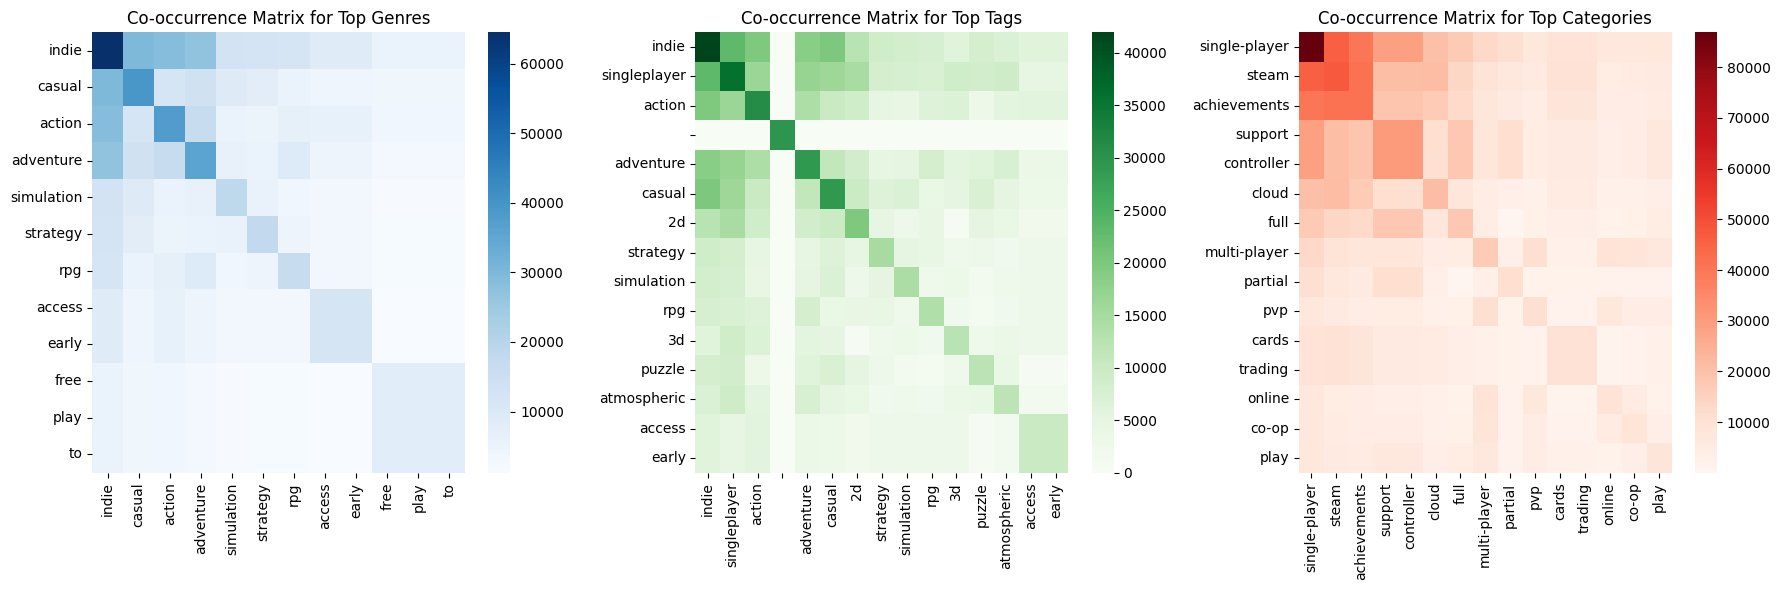

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Convert the list of genres, tags, and categories into a format suitable for analysis
games_data['Genres_str'] = games_data['Genres_list'].apply(lambda x: ' '.join(x))
games_data['Tags_str'] = games_data['Tags_list'].apply(lambda x: ' '.join(x))
games_data['Categories_str'] = games_data['Categories_list'].apply(lambda x: ' '.join(x))

# Set a higher min_df to ignore rare genres/tags/categories
genres_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '), binary=True, min_df=0.05, token_pattern=None)
tags_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '), binary=True, min_df=0.05, token_pattern=None)
categories_vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '), binary=True, min_df=0.05, token_pattern=None)


# Fit and transform the data without converting to dense arrays
genres_matrix = genres_vectorizer.fit_transform(games_data['Genres_str'])
tags_matrix = tags_vectorizer.fit_transform(games_data['Tags_str'])
categories_matrix = categories_vectorizer.fit_transform(games_data['Categories_str'])

# Convert the matrices to DataFrame for better visualization
genres_df = pd.DataFrame(genres_matrix.toarray(), columns=genres_vectorizer.get_feature_names_out())
tags_df = pd.DataFrame(tags_matrix.toarray(), columns=tags_vectorizer.get_feature_names_out())
categories_df = pd.DataFrame(categories_matrix.toarray(), columns=categories_vectorizer.get_feature_names_out())

# Calculate the co-occurrence matrix using sparse matrix multiplication
genres_co_occurrence = genres_df.T.dot(genres_df)
tags_co_occurrence = tags_df.T.dot(tags_df)
categories_co_occurrence = categories_df.T.dot(categories_df)

# Limit to top N most common genres/tags/categories based on frequency
top_n_genres = genres_df.sum().sort_values(ascending=False).head(15).index  # Top 15 genres
top_n_tags = tags_df.sum().sort_values(ascending=False).head(15).index      # Top 15 tags
top_n_categories = categories_df.sum().sort_values(ascending=False).head(15).index  # Top 15 categories

# Filter the co-occurrence matrices to only include the top N elements
genres_co_occurrence_top = genres_co_occurrence.loc[top_n_genres, top_n_genres]
tags_co_occurrence_top = tags_co_occurrence.loc[top_n_tags, top_n_tags]
categories_co_occurrence_top = categories_co_occurrence.loc[top_n_categories, top_n_categories]

# Create a 1x3 grid for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the co-occurrence matrix for top N genres
sns.heatmap(genres_co_occurrence_top, cmap='Blues', annot=False,
            xticklabels=top_n_genres, yticklabels=top_n_genres, ax=axes[0])
axes[0].set_title('Co-occurrence Matrix for Top Genres')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Plot the co-occurrence matrix for top N tags
sns.heatmap(tags_co_occurrence_top, cmap='Greens', annot=False,
            xticklabels=top_n_tags, yticklabels=top_n_tags, ax=axes[1])
axes[1].set_title('Co-occurrence Matrix for Top Tags')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

# Plot the co-occurrence matrix for top N categories
sns.heatmap(categories_co_occurrence_top, cmap='Reds', annot=False, 
            xticklabels=top_n_categories, yticklabels=top_n_categories, ax=axes[2])
axes[2].set_title('Co-occurrence Matrix for Top Categories')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



### **Analysis**
The heatmaps above represent the co-occurrence matrices for the top 15 **Genres**, **Tags**, and **Categories**. By analyzing these co-occurrence patterns, I can gain valuable insights into how different aspects of games are related and how they reflect trends in game design and player preferences.

#### 1. **Co-occurrence Matrix for Genres**
- I observe a strong co-occurrence between **Indie** and other genres, particularly with **Casual** and **Action**. This suggests that Indie games often span multiple genres, reflecting their diversity and flexibility.
- Popular genres like **Action** and **Adventure** are highly related to other genres, while more specific genres such as **RPG** and **Simulation** show a more limited co-occurrence, indicating their niche nature in the gaming landscape.

#### 2. **Co-occurrence Matrix for Tags**
- The **Single-player** tag shows strong co-occurrence with many other tags, especially with **Action** and **Adventure**. This reflects the prevalence of single-player games in these genres.
- Tags like **2D** and **Casual**, as well as **Puzzle**, demonstrate strong co-occurrence, indicating that these types of games often share similar gameplay features and styles.

#### 3. **Co-occurrence Matrix for Categories**
- Categories like **Single-player** and **Steam** show the strongest co-occurrence with other categories. This suggests that these categories are widely used across a variety of games.
- I also notice the co-occurrence between **Multi-player** and **Co-op**, reflecting the popularity of cooperative gameplay modes in multiplayer games.
- Functional categories such as **Controller** and **Achievements** show strong co-occurrence, indicating that many games support these features, which are commonly associated with enhanced gameplay experiences.

#### **Insight**
The co-occurrence patterns across genres, tags, and categories reveal a clear trend toward creating hybrid gaming experiences that cater to diverse player preferences. **Indie games**, in particular, exemplify this trend by blending multiple genres and offering experimental gameplay. Popular genres like **Action** and **Adventure**, alongside features like **Single-player** and **Achievements**, dominate the landscape, suggesting that traditional single-player experiences continue to be highly valued by players and are not losing their appeal. Simultaneously, the strong co-occurrence of **Multi-player** and **Co-op** highlights the growing demand for social and cooperative gameplay, reflecting the increasing importance of community-driven gaming experiences.

# Model Building Using Various Clustering Techniques

In this section, I will apply two clustering techniques to the Steam Games Dataset: **K-Means** and **Hierarchical Clustering**. These methods allow us to explore how games can be grouped based on their textual features, and to compare the strengths and weaknesses of each clustering approach.

## Feature Vectorization
First, I used **CountVectorizer** and **TfidfVectorizer** to transform the textual data into numerical form, which can be used for clustering.


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

# Join lists into strings for Bag of Words approach
games_data['Genres_str'] = games_data['Genres_list'].apply(lambda x: ' '.join(x))
games_data['Tags_str'] = games_data['Tags_list'].apply(lambda x: ' '.join(x))

# Create Bag of Words vectors for Genres and Tags
vectorizer_genres = CountVectorizer()
genres_bow = vectorizer_genres.fit_transform(games_data['Genres_str'])

vectorizer_tags = CountVectorizer()
tags_bow = vectorizer_tags.fit_transform(games_data['Tags_str'])

# Convert to dense arrays
genres_bow_array = genres_bow.toarray()
tags_bow_array = tags_bow.toarray()

# Create TF-IDF vectors for Genres and Tags
tfidf_vectorizer_genres = TfidfVectorizer()
genres_tfidf = tfidf_vectorizer_genres.fit_transform(games_data['Genres_str'])

tfidf_vectorizer_tags = TfidfVectorizer()
tags_tfidf = tfidf_vectorizer_tags.fit_transform(games_data['Tags_str'])

# Convert to dense arrays
genres_tfidf_array = genres_tfidf.toarray()
tags_tfidf_array = tags_tfidf.toarray()

# Combine BoW/TF-IDF arrays for clustering
combined_features_bow = np.hstack([genres_bow_array, tags_bow_array])
combined_features_tfidf = np.hstack([genres_tfidf_array, tags_tfidf_array])

## K-Means Clustering
I applied K-Means clustering to the combined TF-IDF feature vectors and used the Elbow method to determine the optimal number of clusters.


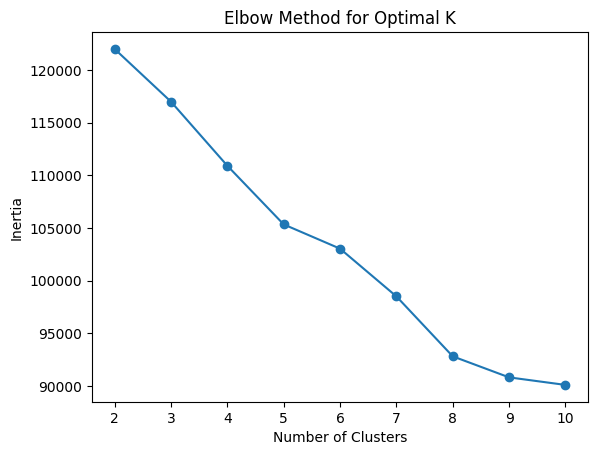

In [27]:
from sklearn.cluster import KMeans
import os

os.environ["LOKY_MAX_CPU_COUNT"] = "4"

# Determine the optimal number of clusters using the Elbow method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_features_tfidf)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Based on the Elbow Method plot, I will select 5 as the number of clusters. 

In [28]:
# Set the optimal number of clusters
optimal_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(combined_features_tfidf)

# Assign cluster labels to the data
games_data['Cluster'] = kmeans.labels_

### t-SNE Visualization of Clusters
Finally, I applied t-SNE to visualize the clustering results on a 2D plane for a subset of the data.


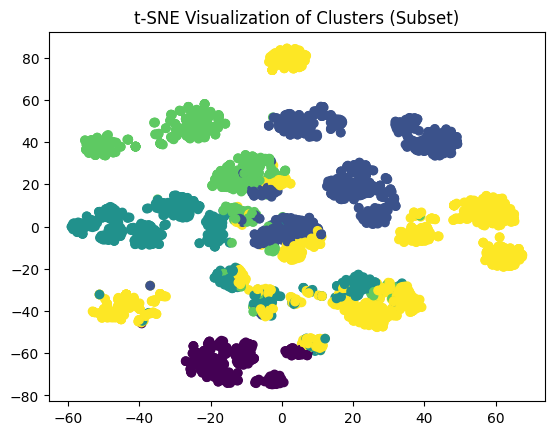

In [29]:
from sklearn.manifold import TSNE

# Randomly sample 5000 points for visualization
subset = np.random.choice(combined_features_tfidf.shape[0], size=5000, replace=False)
data_for_clustering_subset = combined_features_tfidf[subset]
games_data_subset = games_data.iloc[subset]

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_2d_subset = tsne.fit_transform(data_for_clustering_subset)

# Plot the clusters
plt.scatter(data_2d_subset[:, 0], data_2d_subset[:, 1], c=games_data_subset['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters (Subset)')
plt.show()

The t-SNE plot provides a two-dimensional representation of the clusters. Each color represents a different cluster, and the plot demonstrates that the clusters are well-separated, though some overlap is present. This visualization confirms that the K-Means algorithm has effectively grouped games into distinct clusters, reflecting differences in their genres, tags, and other features.

### Cluster Analysis
I analyzed the most common genres and tags within each cluster to better understand the structure of the data. The clusters revealed distinct groupings of games based on their genres and tags.

In [30]:
for cluster_num in range(optimal_clusters):
    print(f"Cluster {cluster_num} Analysis")

    # Filter games in the current cluster
    cluster_games = games_data[games_data['Cluster'] == cluster_num]

    # Count the genres in this cluster
    genre_counter = Counter([genre for sublist in cluster_games['Genres_list'] for genre in sublist if genre])
    common_genres = genre_counter.most_common(5)

    # Count the tags in this cluster
    tag_counter = Counter([tag for sublist in cluster_games['Tags_list'] for tag in sublist if tag])
    common_tags = tag_counter.most_common(5)

    print("Top 5 Genres:", common_genres)
    print("Top 5 Tags:", common_tags)
    print("-" * 40)

Cluster 0 Analysis
Top 5 Genres: [('Free to Play', 7910), ('Indie', 5277), ('Casual', 3666), ('Action', 3441), ('Adventure', 2895)]
Top 5 Tags: [('Free to Play', 3227), ('Indie', 2218), ('Action', 1638), ('Casual', 1602), ('Singleplayer', 1303)]
----------------------------------------
Cluster 1 Analysis
Top 5 Genres: [('Adventure', 22740), ('Indie', 16782), ('Action', 10097), ('Casual', 7513), ('RPG', 5048)]
Top 5 Tags: [('Adventure', 17192), ('Indie', 11426), ('Singleplayer', 10318), ('Action', 8352), ('Casual', 6363)]
----------------------------------------
Cluster 2 Analysis
Top 5 Genres: [('Simulation', 16526), ('Indie', 11461), ('Casual', 8272), ('Adventure', 5443), ('Strategy', 5144)]
Top 5 Tags: [('Simulation', 11718), ('Indie', 7095), ('Singleplayer', 6754), ('Casual', 6041), ('Strategy', 4264)]
----------------------------------------
Cluster 3 Analysis
Top 5 Genres: [('Casual', 13289), ('Indie', 10715), ('Strategy', 6720), ('RPG', 1549), ('Adventure', 924)]
Top 5 Tags: [('C

### Cluster Interpretation 
Here’s a brief interpretation of the key insights from each cluster:
- **Cluster 0**: Dominated by **Free-to-Play** and **Indie** games, highlighting smaller developers and accessible gaming experiences.
- **Cluster 1**: Focuses on **Adventure** and **Action** genres, with many popular indie titles and RPG elements.
- **Cluster 2**: Primarily **Simulation** games, with a mix of strategy and management mechanics.
- **Cluster 3**: Features **Casual** and **Puzzle** games, offering simple and relaxing gameplay experiences.
- **Cluster 4**: Concentrates on **Action** and **Early Access** games, reflecting fast-paced gameplay and ongoing development.

Also, throughout all clusters, one of the strongest and most consistent factors is the presence of **Indie** games. This suggests that **Indie** titles have a significant impact across various genres, ranging from **Free-to-Play** in Cluster 0 to **Adventure** and **Action** games in Cluster 1, and even **Simulation** and **Casual** games in other clusters. The prominence of **Indie** games indicates a trend toward smaller, independent developers playing a major role in shaping the diversity and innovation of the Steam platform. Moreover, the focus on single-player experiences and accessible game mechanics further highlights the preferences of a broad audience for engaging, yet uncomplicated gameplay.

Overall, the clustering results have successfully revealed distinct patterns in the Steam games dataset.

## Hierarchical Clustering

In this section, I applied **Hierarchical Clustering** to the Steam Games Dataset to compare it with K-Means clustering. Hierarchical clustering is a method that builds a hierarchy of clusters either by successively merging smaller clusters (agglomerative) or splitting larger clusters (divisive). For this analysis, I used the **Agglomerative Clustering** approach with the **Ward linkage method**, which minimizes the variance within clusters.

### Dendrogram for Hierarchical Clustering

To visualize the hierarchical structure of the data, I created a **dendrogram**. 


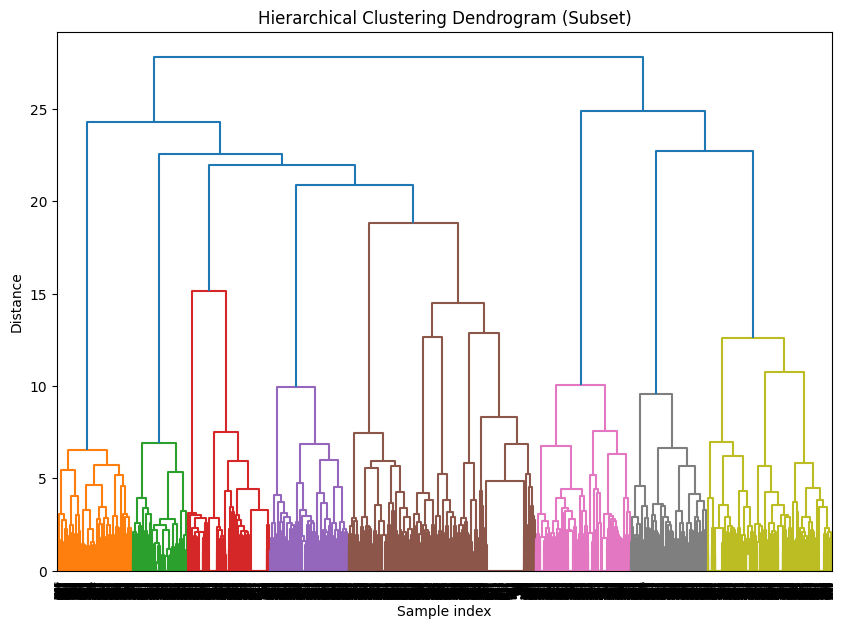

In [31]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Randomly select a subset of 5000 samples
subset_indices = np.random.choice(combined_features_tfidf.shape[0], size=5000, replace=False)
data_subset = combined_features_tfidf[subset_indices]

# Perform hierarchical clustering using the Ward linkage method on the subset
Z = linkage(data_subset, method='ward')

# Plot the dendrogram for the hierarchical clustering result
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram (Subset)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


The dendrogram from hierarchical clustering reveals the structure of the dataset, showing clear distinctions between clusters at higher levels (around height 15 to 25), where large vertical jumps occur. This suggests that merging clusters beyond this point would combine significantly different groups, indicating that 5 to 7 clusters may be optimal for further analysis. Compared to K-Means, hierarchical clustering provides a more flexible view of the data, allowing us to explore relationships between games at various levels of granularity.

For this dataset, I will select **6** as the number of clusters. 

In [32]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

# Select a subset of 5000 samples from the data
subset_indices = np.random.choice(combined_features_tfidf.shape[0], size=5000, replace=False)
data_subset = combined_features_tfidf[subset_indices]

# Apply hierarchical clustering with 6 clusters on the subset
agg_clustering = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(data_subset)


# Assign the cluster labels to the subset, Make an explicit copy of the subset
games_data_subset = games_data.iloc[subset_indices].copy()

# Assign the cluster labels to the subset
games_data_subset['Agg_Cluster'] = agg_labels

# Check the distribution of games across clusters
print(games_data_subset['Agg_Cluster'].value_counts())


Agg_Cluster
0    2013
2     877
1     728
3     501
4     496
5     385
Name: count, dtype: int64


### Cluster Analysis
I analyzed the most common genres and tags within each cluster to better understand the structure of the data again.

In [33]:
from collections import Counter

# Iterate over each cluster label
for cluster_num in games_data_subset['Agg_Cluster'].unique():
    print(f"Cluster {cluster_num} Analysis")

    # Filter games in the current cluster
    cluster_games = games_data_subset[games_data_subset['Agg_Cluster'] == cluster_num]

    # Count the genres in this cluster
    genre_counter = Counter([genre for sublist in cluster_games['Genres_list'] for genre in sublist if genre])
    common_genres = genre_counter.most_common(5)  # Top 5 genres

    # Count the tags in this cluster
    tag_counter = Counter([tag for sublist in cluster_games['Tags_list'] for tag in sublist if tag])
    common_tags = tag_counter.most_common(5)  # Top 5 tags

    # Output the results
    print("Top 5 Genres:", common_genres)
    print("Top 5 Tags:", common_tags)
    print("-" * 40)



Cluster 0 Analysis
Top 5 Genres: [('Indie', 1162), ('Casual', 842), ('Simulation', 766), ('Strategy', 659), ('Action', 589)]
Top 5 Tags: [('Indie', 723), ('Casual', 575), ('Singleplayer', 572), ('Simulation', 568), ('Strategy', 507)]
----------------------------------------
Cluster 3 Analysis
Top 5 Genres: [('Early Access', 501), ('Indie', 397), ('Action', 271), ('Casual', 181), ('Adventure', 180)]
Top 5 Tags: [('Early Access', 368), ('Action', 212), ('Indie', 211), ('Singleplayer', 197), ('Adventure', 129)]
----------------------------------------
Cluster 4 Analysis
Top 5 Genres: [('RPG', 495), ('Indie', 345), ('Adventure', 267), ('Action', 172), ('Strategy', 137)]
Top 5 Tags: [('RPG', 369), ('Adventure', 229), ('Singleplayer', 217), ('Indie', 215), ('Action', 137)]
----------------------------------------
Cluster 1 Analysis
Top 5 Genres: [('Indie', 581), ('Casual', 570), ('Action', 151), ('Adventure', 7), ('Simulation', 3)]
Top 5 Tags: [('Casual', 433), ('Indie', 401), ('Singleplayer

### Cluster Analysis

The hierarchical clustering results show that **Indie** games are consistently prominent across all clusters, reflecting their significant role on the Steam platform. However, each cluster has its own distinct focus:

- **Cluster 0**: Dominated by **Indie**, **Casual**, and **Simulation** games, suggesting a focus on creative and relaxing gameplay.
- **Cluster 1**: Features many **RPG** and **Adventure** games, indicating a preference for story-driven, immersive experiences.
- **Cluster 2**: Primarily consists of **Adventure** and **Action** games, emphasizing exploration and excitement.
- **Cluster 3**: High in **Free to Play** and **Casual** games, appealing to players seeking easy access and simple gameplay.
- **Cluster 4**: **Early Access** games are dominant, representing games in development that are actively engaging with their communities.
- **Cluster 5**: Focused on **Action** and **Arcade** games, attracting players who enjoy fast-paced, high-energy experiences.

Overall, **Indie** games are a key component across all clusters, while each cluster highlights different gameplay styles, from casual and creative to action-packed and immersive.

## Comparison Between K-Means and Hierarchical Clustering

Both clustering methods reveal **Indie** games as a dominant genre across most clusters, highlighting their strong presence on the Steam platform. However, there are key differences and commonalities between the two methods:

#### Commonalities:
- **Indie Games**: Both K-Means and Hierarchical Clustering consistently show **Indie** games as a major genre across nearly all clusters. This indicates that indie games form a significant portion of Steam's library, regardless of the clustering method used.
- **Casual and Action Games**: Both methods also show a strong representation of **Casual** and **Action** games, suggesting these genres have broad appeal and appear frequently in various game categories.
- **Singleplayer Focus**: In both clustering methods, the **Singleplayer** tag is frequently among the top tags, indicating that a large number of Steam games are designed for single-player experiences.

#### Differences:
- **Cluster Specialization**: Hierarchical Clustering shows a clear distinction with a cluster focusing on **Early Access** games (Cluster 4), which was less pronounced in the K-Means results. This indicates that Hierarchical Clustering may capture more niche categories or ongoing development games.
- **Free to Play Focus**: K-Means identifies a distinct cluster (Cluster 3) dominated by **Free to Play** games, while this was less evident in the hierarchical method. This suggests that K-Means may be more effective at capturing commercial models such as free-to-play games.
- **RPG Representation**: **RPG** games are more prominent in specific clusters in Hierarchical Clustering (Cluster 1), whereas in K-Means, RPGs appear in broader clusters mixed with other genres. This might indicate that hierarchical clustering can better isolate niche genres like RPGs.

### Conclusion:
While both K-Means and Hierarchical Clustering highlight **Indie**, **Casual**, and **Action** games as major categories on Steam, Hierarchical Clustering provides a more nuanced separation of niche genres like **RPG** and **Early Access** games. On the other hand, K-Means is effective at grouping broader categories such as **Free to Play** games. The choice of clustering method can therefore influence the granularity and focus of the analysis depending on the specific characteristics being explored.